# Kaggle fraud detection data

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_json('data/transactions/transactions.txt', lines=True)
data=df.copy()

In [3]:
#df = data.sample(1000)
#df = data[:1000]

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [5]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [6]:
isFraud = df.groupby(['isFraud']).size()
percentFraud = 100*isFraud[1]/(isFraud[0]+isFraud[1])

print(f"TOTAL: Percentage fraud: {percentFraud:.2} %")

TOTAL: Percentage fraud: 1.6 %


In [7]:
df.shape

(786363, 29)

In [8]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [9]:
df.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

In [10]:
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [11]:
df[df.isna().any(axis=1)]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud


In [12]:
df = df.replace("", "Empty")

In [13]:
# Drop Sensitive/personal data 
df.drop(['accountNumber', 'customerId','cardLast4Digits',"currentBalance"],axis = 1,inplace = True)

In [14]:
df.nunique()

creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
transactionType                  4
echoBuffer                       1
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64

In [15]:
# Drop data with single values 
# Not useful features nunique=1
df.drop(["echoBuffer","merchantCity","merchantState","merchantZip","posOnPremises","recurringAuthInd"],axis = 1,inplace = True)

In [16]:
# Bools True/False to 1/0
df['cardPresent'] = np.where(df['cardPresent'] == True, 1, 0)
df['expirationDateKeyInMatch'] = np.where(df['expirationDateKeyInMatch'] == True, 1, 0)
df['isFraud']     = np.where(df['isFraud'] == True, 1, 0)


In [17]:
df.groupby(['merchantName']).size()

merchantName
1st BBQ                        835
1st Deli                       802
1st Pub                        800
1st Restaurant                 862
1st Sandwitch Bar #119707      781
                             ...  
staples.com                  16980
target.com                   16813
walmart.com                  16873
westelm.com                    498
williamssonoma.com             499
Length: 2490, dtype: int64

In [18]:
df.groupby(['acqCountry']).size()

acqCountry
CAN        2424
Empty      4562
MEX        3130
PR         1538
US       774709
dtype: int64

In [19]:
df.groupby(['merchantCountryCode']).size()

merchantCountryCode
CAN        2426
Empty       724
MEX        3143
PR         1559
US       778511
dtype: int64

In [20]:
df.groupby(['posEntryMode']).size()

posEntryMode
02       195934
05       315035
09       236481
80        15283
90        19576
Empty      4054
dtype: int64

In [21]:
df.groupby(['posConditionCode']).size()

posConditionCode
01       628787
08       149634
99         7533
Empty       409
dtype: int64

In [22]:
df.groupby(['merchantCategoryCode']).size()

merchantCategoryCode
airline                  15412
auto                     21651
cable/phone               1382
entertainment            80098
fastfood                112138
food                     75490
food_delivery             6000
fuel                     23910
furniture                 7432
gym                       2209
health                   19092
hotels                   34097
mobileapps               14990
online_gifts             66238
online_retail           202156
online_subscriptions     11067
personal care            18964
rideshare                51136
subscriptions            22901
dtype: int64

In [23]:
df.groupby(['transactionType']).size()

transactionType
ADDRESS_VERIFICATION     20169
Empty                      698
PURCHASE                745193
REVERSAL                 20303
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for categoricals
# for colname in X.select_dtypes("object"):
#    X[colname], _ = X[colname].factorize()

# dtypes object
#'merchantName','acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode''transactionType'

LE = LabelEncoder()
df['merchantName_code']         = LE.fit_transform(df['merchantName']).astype(int)
df['acqCountry_code']           = LE.fit_transform(df['acqCountry']).astype(int)
df['merchantCountryCode_code']  = LE.fit_transform(df['merchantCountryCode']).astype(int)
df['posEntryMode_code']         = LE.fit_transform(df['posEntryMode']).astype(int)
df['posConditionCode_code']     = LE.fit_transform(df['posConditionCode']).astype(int)
df['merchantCategoryCode_code'] = LE.fit_transform(df['merchantCategoryCode']).astype(int)
df['transactionType_code']      = LE.fit_transform(df['transactionType']).astype(int)

In [25]:
df.groupby(['transactionType_code']).size()

transactionType_code
0     20169
1       698
2    745193
3     20303
dtype: int64

In [26]:
df.groupby(['acqCountry_code']).size()

acqCountry_code
0      2424
1      4562
2      3130
3      1538
4    774709
dtype: int64

In [27]:
df.dtypes

creditLimit                    int64
availableMoney               float64
transactionDateTime           object
transactionAmount            float64
merchantName                  object
acqCountry                    object
merchantCountryCode           object
posEntryMode                  object
posConditionCode              object
merchantCategoryCode          object
currentExpDate                object
accountOpenDate               object
dateOfLastAddressChange       object
cardCVV                        int64
enteredCVV                     int64
transactionType               object
cardPresent                    int64
expirationDateKeyInMatch       int64
isFraud                        int64
merchantName_code              int64
acqCountry_code                int64
merchantCountryCode_code       int64
posEntryMode_code              int64
posConditionCode_code          int64
merchantCategoryCode_code      int64
transactionType_code           int64
dtype: object

In [28]:
df['transactionDateTime']       = pd.to_datetime(df['transactionDateTime'])
df['dateOfLastAddressChange']   = pd.to_datetime(df['dateOfLastAddressChange'])
df['currentExpDate']            = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate']           = pd.to_datetime(df['accountOpenDate'])

In [29]:
df.columns

Index(['creditLimit', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'transactionType',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud',
       'merchantName_code', 'acqCountry_code', 'merchantCountryCode_code',
       'posEntryMode_code', 'posConditionCode_code',
       'merchantCategoryCode_code', 'transactionType_code'],
      dtype='object')

In [30]:
# Mutual information (MI)
# The MI between two quantities is a measure of the extent to which knowledge 
# of one quantity reduces uncertainty about the other.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression


def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [31]:
# Mutual information (MI)
# only works with int values
df['transactionAmount_int']       = df['transactionAmount'].astype(int)                   
df['availableMoney_int']          = df['availableMoney'].astype(int) 

#df['transactionDateTime_int']     = df['transactionDateTime'].replace("-","").astype(int)       
#df['currentExpDate_int']          = df['currentExpDate'].replace("-","").astype(int)          
#df['accountOpenDate_int']         = df['accountOpenDate'].replace("-","").astype(int)           
#df['dateOfLastAddressChange_int'] = df['dateOfLastAddressChange'].replace("-","").astype(int)

X = df[:1000].copy()
# drop non int values
X.drop(['merchantName','acqCountry','merchantCountryCode','posEntryMode',
        'posConditionCode','merchantCategoryCode','transactionType',
        'transactionAmount','availableMoney',
        'transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange'],
        axis = 1,inplace = True)
y = X.pop("isFraud")

In [32]:
X.columns

Index(['creditLimit', 'cardCVV', 'enteredCVV', 'cardPresent',
       'expirationDateKeyInMatch', 'merchantName_code', 'acqCountry_code',
       'merchantCountryCode_code', 'posEntryMode_code',
       'posConditionCode_code', 'merchantCategoryCode_code',
       'transactionType_code', 'transactionAmount_int', 'availableMoney_int'],
      dtype='object')

In [33]:
print(X.shape, y.shape)

(1000, 14) (1000,)


In [34]:
# Train and score baseline model

baseline = RandomForestRegressor(criterion="absolute_error", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 0.00599


In [35]:
X.head()

,creditLimit,cardCVV,enteredCVV,cardPresent,expirationDateKeyInMatch,merchantName_code,acqCountry_code,merchantCountryCode_code,posEntryMode_code,posConditionCode_code,merchantCategoryCode_code,transactionType_code,transactionAmount_int,availableMoney_int
0,5000,414,414,0,0,2086,4,4,0,0,17,2,98,5000
1,5000,486,486,1,0,27,4,4,2,0,3,2,74,5000
2,5000,486,486,0,0,1305,4,4,2,0,12,2,7,5000
3,5000,486,486,0,0,1305,4,4,2,0,12,2,7,5000
4,5000,885,885,1,0,2084,4,4,0,0,4,2,71,5000


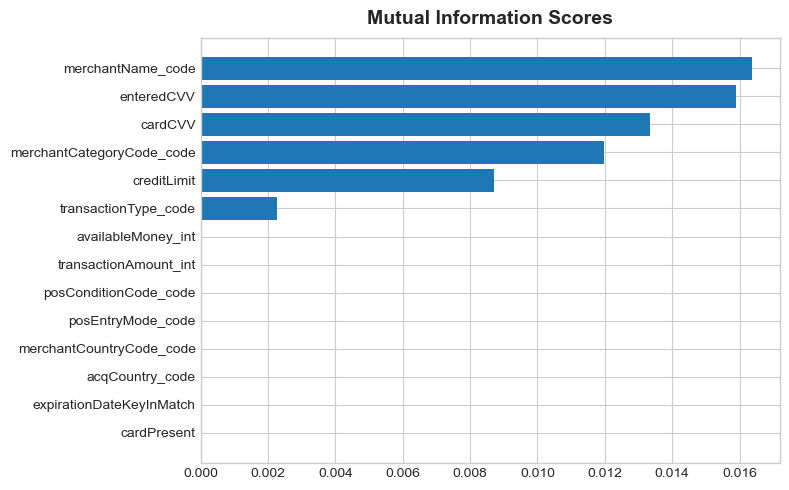

In [36]:
# Mutual Information
discrete_features = X.dtypes == int

mi_scores = make_mi_scores(X, y, discrete_features)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Feature Engineering 

In [37]:
df.columns

Index(['creditLimit', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'transactionType',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud',
       'merchantName_code', 'acqCountry_code', 'merchantCountryCode_code',
       'posEntryMode_code', 'posConditionCode_code',
       'merchantCategoryCode_code', 'transactionType_code',
       'transactionAmount_int', 'availableMoney_int'],
      dtype='object')

In [38]:
# Convert 'cardCVV' != 'enteredCVV' to bool and remove CVV sensitive data
df["CVVmatch"] = df['cardCVV']- df['enteredCVV']
df.drop(['cardCVV','enteredCVV'],axis = 1,inplace = True)
df['CVVmatch']    = np.where(df['CVVmatch'] == True, 1, 0)

In [39]:
df.groupby(['creditLimit']).size()

creditLimit
250       34025
500       27097
1000      36430
2500      75429
5000     201863
7500      97913
10000     56889
15000    139307
20000     68629
50000     48781
dtype: int64

In [40]:
# Calculate ranges
percentile = df['availableMoney'].describe().loc[['25%','50%','75%']].values.astype("int")
m_min = int(2*df['availableMoney'].min())
m_max = int(2*df['availableMoney'].max())

#print(m_min, 0, percentile[0], percentile[1], percentile[2], m_max)
print(-m_max, 0, percentile[0], percentile[1], percentile[2], m_max)

-100000 0 1077 3184 7500 100000


In [41]:
bins = [-m_max, 0, percentile[0], percentile[1], percentile[2], m_max]
group_names=[0,1,2,3,4]

df['availableMoneyScore'] = pd.cut(df['availableMoney'],bins,labels=group_names)
df["availableMoneyScore"] = df["availableMoneyScore"].astype("int") 

In [42]:
# positive values even group size. Seems reasonable. Could also use other methods eg pd.cut
df.groupby(["availableMoneyScore"]).size()

availableMoneyScore
0      2931
1    193604
2    196586
3    199843
4    193399
dtype: int64

In [43]:
df['transactionAmount'].describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

In [44]:
# Calculate ranges
percentile = df['transactionAmount'].describe().loc[['25%','50%','75%']].values.astype("int")
m_min = -1 # transaction always above 0
m_max = int(df['transactionAmount'].max())
m_max2 = 2*m_max

print(m_min, percentile[0], percentile[1], percentile[2], m_max, m_max2)

-1 33 87 191 2011 4022


In [45]:
bins = [m_min, percentile[0], percentile[1], percentile[2], m_max, m_max2]
group_names=[0,1,2,3,4]

df['transactionRange']=pd.cut(df['transactionAmount'],bins,labels=group_names)

df["transactionRange"] = df["transactionRange"].astype("int") 

In [46]:
df.groupby(["transactionRange"]).size()

transactionRange
0    193743
1    197062
2    198376
3    197181
4         1
dtype: int64

In [47]:
df.dtypes

creditLimit                           int64
availableMoney                      float64
transactionDateTime          datetime64[ns]
transactionAmount                   float64
merchantName                         object
acqCountry                           object
merchantCountryCode                  object
posEntryMode                         object
posConditionCode                     object
merchantCategoryCode                 object
currentExpDate               datetime64[ns]
accountOpenDate              datetime64[ns]
dateOfLastAddressChange      datetime64[ns]
transactionType                      object
cardPresent                           int64
expirationDateKeyInMatch              int64
isFraud                               int64
merchantName_code                     int64
acqCountry_code                       int64
merchantCountryCode_code              int64
posEntryMode_code                     int64
posConditionCode_code                 int64
merchantCategoryCode_code       

In [48]:
# Extract month, day hour from transactionDateTime
df['transactionDateTime_month'] = df['transactionDateTime'].dt.month
df['transactionDateTime_day']   = df['transactionDateTime'].dt.day
df['transactionDateTime_hour']  = df['transactionDateTime'].dt.hour.astype("int")

# df['transactionDateTime_weekend']

# morning afternoon evening night
df['transaction_morning']   = df["transactionDateTime_hour"].between(6,12).astype("int")
df['transaction_afternoon'] = df['transactionDateTime_hour'].between(12,18).astype("int")
df['transaction_evening']   = df['transactionDateTime_hour'].between(18,24).astype("int")
df['transaction_night']     = df['transactionDateTime_hour'].between(0,6).astype("int")

#df['transaction_night']     = df['transactionDateTime_hour'].apply(lambda x: 'True' if (x >0 & x<=6) else 'False')


# Add time since last transaction
df['daysSinceLastTransaction']   = (pd.to_datetime('today')-df.transactionDateTime).dt.days

# Days since last address change 
df['daysSinceLastAddressChange'] = (pd.to_datetime('today')-df.dateOfLastAddressChange).dt.days

print(pd.to_datetime('today'))   # NB local time !


2023-11-11 17:24:33.587998


In [49]:
df[['transactionDateTime_month','transactionDateTime_day','transactionDateTime_hour','transaction_morning','transaction_afternoon','transaction_evening','transaction_night']].head()

,transactionDateTime_month,transactionDateTime_day,transactionDateTime_hour,transaction_morning,transaction_afternoon,transaction_evening,transaction_night
0,8,13,14,0,1,0,0
1,10,11,5,0,0,0,1
2,11,8,9,1,0,0,0
3,12,10,2,0,0,0,1
4,3,24,21,0,0,1,0


In [50]:
df.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,transactionRange,transactionDateTime_month,transactionDateTime_day,transactionDateTime_hour,transaction_morning,transaction_afternoon,transaction_evening,transaction_night,daysSinceLastTransaction,daysSinceLastAddressChange
0,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,...,2,8,13,14,0,1,0,0,2646,3164
1,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,...,1,10,11,5,0,0,0,1,2587,3164
2,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,...,0,11,8,9,1,0,0,0,2559,3164
3,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,...,0,12,10,2,0,0,0,1,2527,3164
4,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,...,1,3,24,21,0,0,1,0,2787,3019


In [51]:
df.columns

Index(['creditLimit', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'transactionType', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'merchantName_code',
       'acqCountry_code', 'merchantCountryCode_code', 'posEntryMode_code',
       'posConditionCode_code', 'merchantCategoryCode_code',
       'transactionType_code', 'transactionAmount_int', 'availableMoney_int',
       'CVVmatch', 'availableMoneyScore', 'transactionRange',
       'transactionDateTime_month', 'transactionDateTime_day',
       'transactionDateTime_hour', 'transaction_morning',
       'transaction_afternoon', 'transaction_evening', 'transaction_night',
       'daysSinceLastTransaction', 'daysSinceLastAddressChange'],
      dtype='object')

In [52]:
# Select features to use
features = [#'creditLimit', 'availableMoney', 'transactionDateTime',
       #'transactionAmount', 'merchantName', 'acqCountry',
       #'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       #'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       #'dateOfLastAddressChange', 'transactionType', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'merchantName_code',
       'acqCountry_code', 'merchantCountryCode_code', 'posEntryMode_code',
       'posConditionCode_code', 'merchantCategoryCode_code',
       'transactionType_code', 'transactionAmount_int', 'availableMoney_int',
       'CVVmatch', 'availableMoneyScore', 'transactionRange',
       'transactionDateTime_month', 'transactionDateTime_day',
       'transactionDateTime_hour', 
       #'transactionDateTime_morning',
       #'transactionDateTime_afternoon', 'transactionDateTime_evening',
       #'transactionDateTime_night', 
       'daysSinceLastTransaction',
       'daysSinceLastAddressChange', 'transaction_morning',
       'transaction_afternoon', 'transaction_evening', 'transaction_night']

In [53]:
# too slow if use full data
X_new = df[features][:1000]

y_new = X_new.pop("isFraud")

In [54]:
# MAE Baseline Score: 0.02157
new = RandomForestRegressor(criterion="absolute_error", random_state=0)
new_score = cross_val_score(
    new, X_new, y_new, cv=5, scoring="neg_mean_absolute_error"
)
new_score = -1 * new_score.mean()

print(f"MAE New Score: {new_score:.4}")

MAE New Score: 0.00583


In [55]:
X_new.head()

,expirationDateKeyInMatch,merchantName_code,acqCountry_code,merchantCountryCode_code,posEntryMode_code,posConditionCode_code,merchantCategoryCode_code,transactionType_code,transactionAmount_int,availableMoney_int,...,transactionRange,transactionDateTime_month,transactionDateTime_day,transactionDateTime_hour,daysSinceLastTransaction,daysSinceLastAddressChange,transaction_morning,transaction_afternoon,transaction_evening,transaction_night
0,0,2086,4,4,0,0,17,2,98,5000,...,2,8,13,14,2646,3164,0,1,0,0
1,0,27,4,4,2,0,3,2,74,5000,...,1,10,11,5,2587,3164,0,0,0,1
2,0,1305,4,4,2,0,12,2,7,5000,...,0,11,8,9,2559,3164,1,0,0,0
3,0,1305,4,4,2,0,12,2,7,5000,...,0,12,10,2,2527,3164,0,0,0,1
4,0,2084,4,4,0,0,4,2,71,5000,...,1,3,24,21,2787,3019,0,0,1,0


In [56]:
y_new.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [57]:
print(X_new.shape, y_new.shape)

(1000, 22) (1000,)


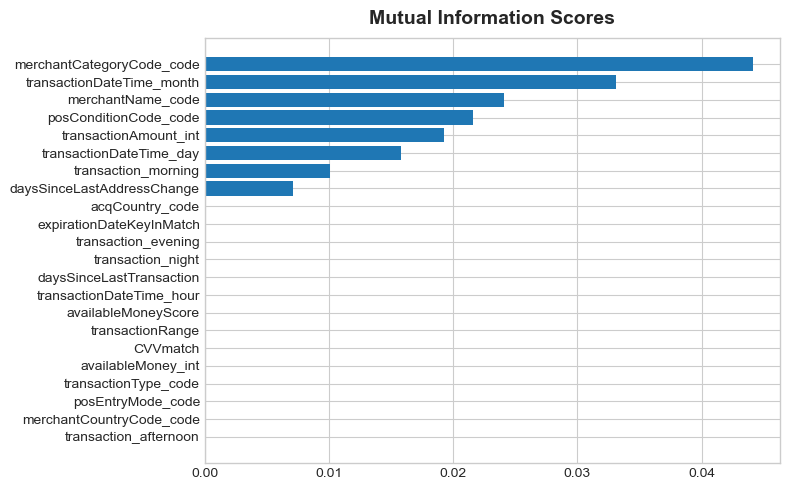

In [58]:
# Mutual Information
X_new.apply(pd.to_numeric)

discrete_features = X_new.dtypes == int

mi_scores = make_mi_scores(X_new, y_new, discrete_features)
#print(mi_scores[::4])

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [59]:
#df.dtypes

In [60]:
#df['merchantName']               = df['merchantName'].factorize()[0]
#df['acqCountry']                 = df['acqCountry'].factorize()[0]
#df['merchantCountryCode']        = df['merchantCountryCode'].factorize()[0]
#df['posEntryMode']               = df['posEntryMode'].factorize()[0]
#df['posConditionCode']           = df['posConditionCode'].factorize()[0]
#df['merchantCategoryCode']       = df['merchantCategoryCode'].factorize()[0]
#df['daysSinceLastTransaction']   = df['daysSinceLastTransaction'].factorize()[0]
#df['daysSinceLastAddressChange'] = df['daysSinceLastAddressChange'].factorize()[0]
#df['transactionType']            = df['transactionType'].factorize()[0]

In [61]:
df_selected = df[features].copy()

In [62]:
# Normalise values
from sklearn import preprocessing

column_names = df_selected.columns

x = df_selected.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_scaled = pd.DataFrame(x_scaled)

data_scaled.columns = column_names
data_scaled.head()

,expirationDateKeyInMatch,isFraud,merchantName_code,acqCountry_code,merchantCountryCode_code,posEntryMode_code,posConditionCode_code,merchantCategoryCode_code,transactionType_code,transactionAmount_int,...,transactionRange,transactionDateTime_month,transactionDateTime_day,transactionDateTime_hour,daysSinceLastTransaction,daysSinceLastAddressChange,transaction_morning,transaction_afternoon,transaction_evening,transaction_night
0,0.0,0.0,0.838088,1.0,1.0,0.0,0.0,0.944444,0.666667,0.048732,...,0.50,0.636364,0.400000,0.608696,0.383562,0.065753,0.0,1.0,0.0,0.0
1,0.0,0.0,0.010848,1.0,1.0,0.4,0.0,0.166667,0.666667,0.036798,...,0.25,0.818182,0.333333,0.217391,0.221918,0.065753,0.0,0.0,0.0,1.0
2,0.0,0.0,0.524307,1.0,1.0,0.4,0.0,0.666667,0.666667,0.003481,...,0.00,0.909091,0.233333,0.391304,0.145205,0.065753,1.0,0.0,0.0,0.0
3,0.0,0.0,0.524307,1.0,1.0,0.4,0.0,0.666667,0.666667,0.003481,...,0.00,1.000000,0.300000,0.086957,0.057534,0.065753,0.0,0.0,0.0,1.0
4,0.0,0.0,0.837284,1.0,1.0,0.0,0.0,0.222222,0.666667,0.035306,...,0.25,0.181818,0.766667,0.913043,0.769863,0.051241,0.0,0.0,1.0,0.0


data_scaled.head()

In [63]:
features = mi_scores[:10]
features

merchantCategoryCode_code     0.044108
transactionDateTime_month     0.033114
merchantName_code             0.024124
posConditionCode_code         0.021576
transactionAmount_int         0.019254
transactionDateTime_day       0.015828
transaction_morning           0.010114
daysSinceLastAddressChange    0.007100
expirationDateKeyInMatch      0.000000
transaction_evening           0.000000
Name: MI Scores, dtype: float64

# Model fitting

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score,precision_score


In [65]:
# Select features create training and testing datasets
#features 

X = data_scaled.drop('isFraud',axis = 1)
y = data_scaled['isFraud']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=3)

df_train = pd.concat([X_train, y_train], ignore_index=True)

In [66]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

y_pred_dt = model_dt.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred_dt):.2} ")
print(f"Precision: {precision_score(y_test,y_pred_dt):.2} ")

print(classification_report(y_test, y_pred_dt))

Accuracy: 0.97 
Precision: 0.076 
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98    386990
         1.0       0.08      0.10      0.09      6192

    accuracy                           0.97    393182
   macro avg       0.53      0.54      0.53    393182
weighted avg       0.97      0.97      0.97    393182



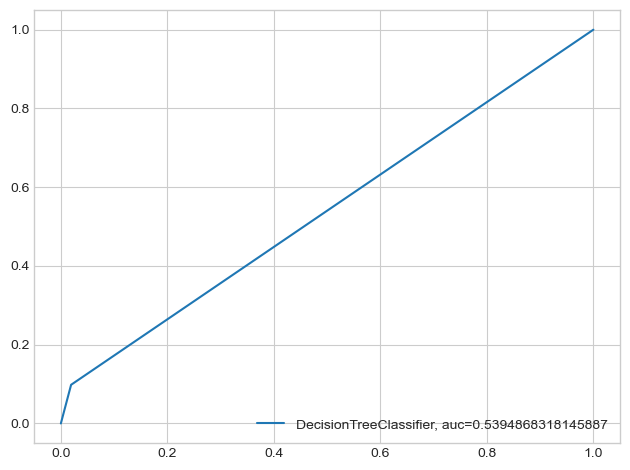

In [67]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_dt)
auc = metrics.roc_auc_score(y_test, y_pred_dt)
plt.plot(fpr,tpr,label="DecisionTreeClassifier, auc="+str(auc))

plt.legend(loc=4)
plt.show()

In [68]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

y_pred_rf = model_rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred_rf):.2} ")
print(f"Precision: {precision_score(y_test,y_pred_rf):.2} ")

print(classification_report(y_test, y_pred_rf))

Accuracy: 0.98 
Precision: 0.98 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    386990
         1.0       0.98      0.01      0.02      6192

    accuracy                           0.98    393182
   macro avg       0.98      0.50      0.51    393182
weighted avg       0.98      0.98      0.98    393182



# Mismatched data sizes
create dataset with even number entries for each fraud category

In [69]:
df_isFraud = data_scaled[data_scaled.isFraud ==1] 
df_notFraud = data_scaled[data_scaled.isFraud ==0] 

In [70]:
print (df_isFraud.shape[0], df_notFraud.shape[0])

12417 773946


In [71]:
df_notFraud2 = df_notFraud.sample(n = 12417)

In [72]:
df_reduced = pd.concat([df_isFraud, df_notFraud2], ignore_index=True)

In [73]:
X2 = df_reduced.drop('isFraud',axis = 1)
y2 = df_reduced['isFraud']

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.5,random_state=3)

In [74]:
print(X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(12417, 22) (12417,) (12417, 22) (12417,)


In [75]:
model_dt2 = DecisionTreeClassifier()
model_dt2.fit(X2_train,y2_train)

y2_pred_dt = model_dt2.predict(X2_test)

print(f"Accuracy: {accuracy_score(y2_test,y2_pred_dt):.2} ")
print(f"Precision: {precision_score(y2_test,y2_pred_dt):.2} ")

print("Percentage Mislabeled points : %d" % (100*((y2_test != y2_pred_dt).sum()) / (X2_test.shape[0])))
print("")
print(classification_report(y2_test, y2_pred_dt))

Accuracy: 0.61 
Precision: 0.62 
Percentage Mislabeled points : 38

              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61      6183
         1.0       0.62      0.61      0.62      6234

    accuracy                           0.61     12417
   macro avg       0.61      0.61      0.61     12417
weighted avg       0.61      0.61      0.61     12417



In [76]:
# Feature importances are provided by the fitted attribute  
# computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

importances = model_dt2.feature_importances_
sorted_indices = np.argsort(importances)

print("Importance of columns in decending order :")
print()

impfeatures = []

for i in sorted_indices:
    imp = X.columns[i]
    impfeatures.append(imp)
    print(imp)

Importance of columns in decending order :

CVVmatch
expirationDateKeyInMatch
acqCountry_code
merchantCountryCode_code
transactionRange
transaction_evening
transactionType_code
transaction_night
transaction_afternoon
transaction_morning
posConditionCode_code
availableMoneyScore
transactionDateTime_month
posEntryMode_code
transactionDateTime_hour
transactionDateTime_day
merchantCategoryCode_code
daysSinceLastTransaction
merchantName_code
availableMoney_int
daysSinceLastAddressChange
transactionAmount_int


In [77]:
# Mutual Information
mi_scores = make_mi_scores(X2, y2, discrete_features)

plt.figure(dpi=100, figsize=(8, 5))
#plot_mi_scores(mi_scores)

print(mi_scores[:10])

availableMoney_int            1.198424
transactionAmount_int         0.225437
merchantName_code             0.193794
daysSinceLastAddressChange    0.172483
merchantCategoryCode_code     0.056813
transactionRange              0.042667
posEntryMode_code             0.026479
posConditionCode_code         0.007366
transaction_afternoon         0.007002
availableMoneyScore           0.004394
Name: MI Scores, dtype: float64


<Figure size 800x500 with 0 Axes>

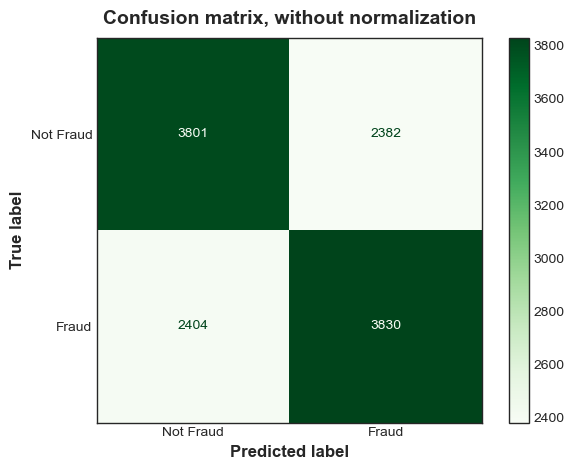

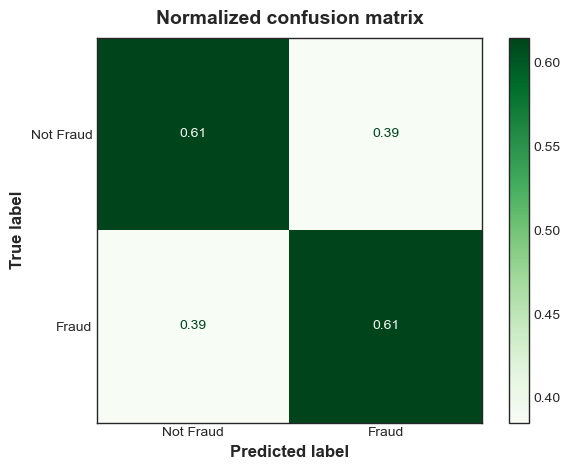

In [78]:
cm = confusion_matrix(y2_test, y2_pred_dt)

sns.set_style("ticks")
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_dt2,
        X2_test,
        y2_test,
        display_labels= ["Not Fraud", "Fraud"],
        cmap=plt.cm.Greens,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

plt.show()

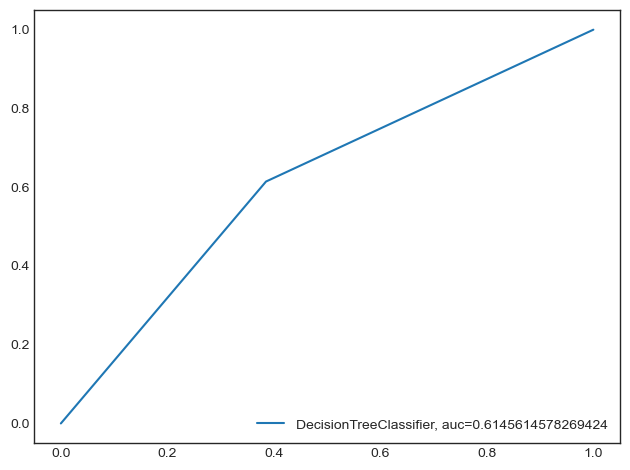

In [79]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(y2_test, y2_pred_dt)
auc = metrics.roc_auc_score(y2_test, y2_pred_dt)

plt.plot(fpr,tpr,label="DecisionTreeClassifier, auc="+str(auc))

plt.legend(loc=4)
plt.show()

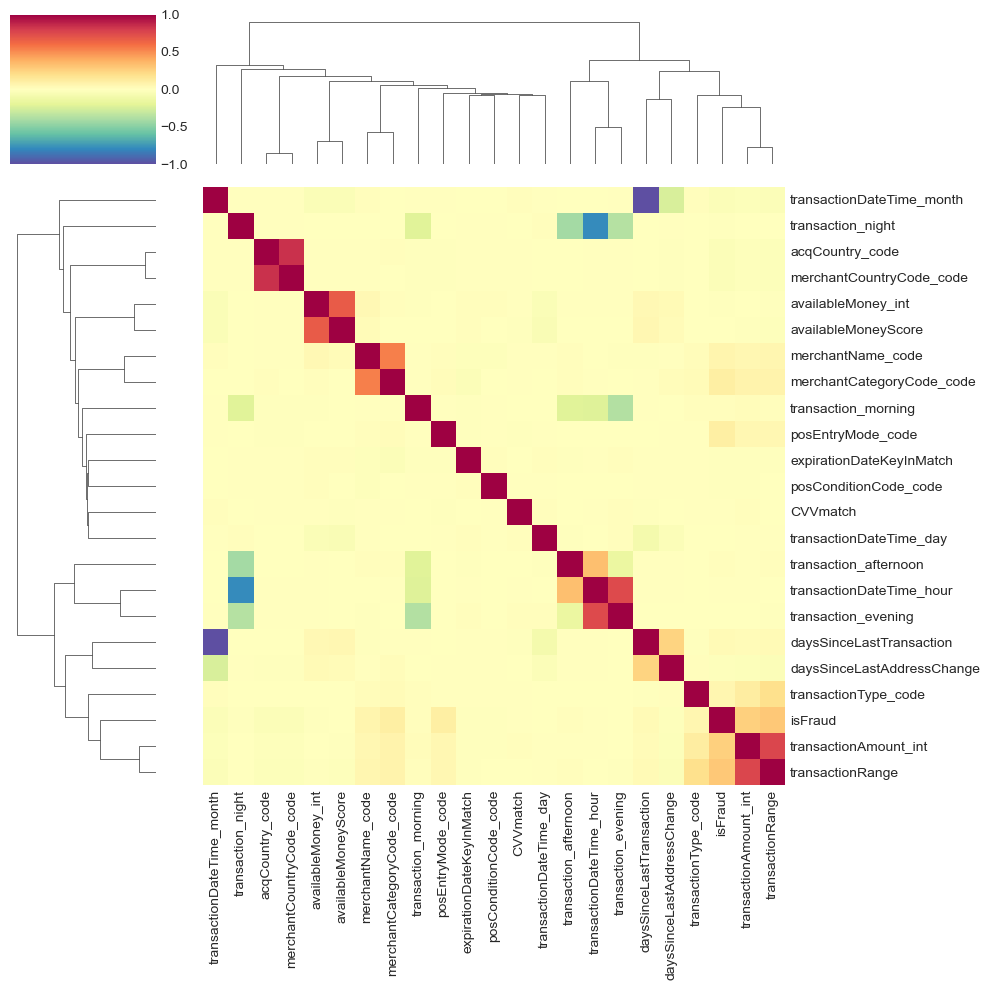

In [80]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method, numeric_only=True),
        vmin=-1.0,
        vmax=1.0,
        #cmap="icefire",
        cmap = "Spectral_r",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(df_reduced, annot=None)

In [81]:
data.groupby(['expirationDateKeyInMatch','isFraud']).size()

expirationDateKeyInMatch  isFraud
False                     False      772916
                          True        12404
True                      False        1030
                          True           13
dtype: int64

<AxesSubplot:xlabel='acqCountry', ylabel='count'>

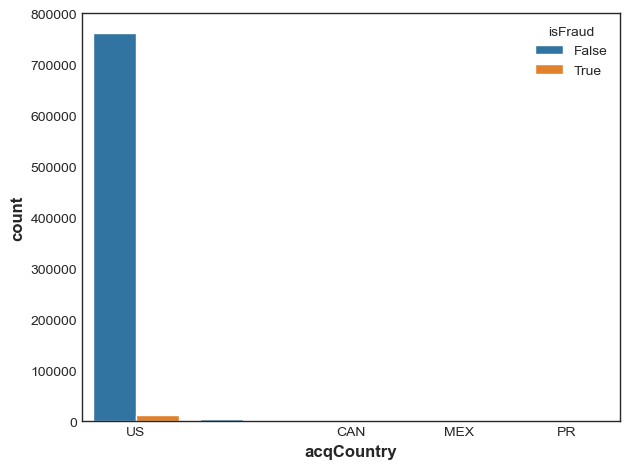

In [82]:
sns.countplot(x='acqCountry', hue='isFraud', data=data)

<AxesSubplot:xlabel='CVVmatch', ylabel='count'>

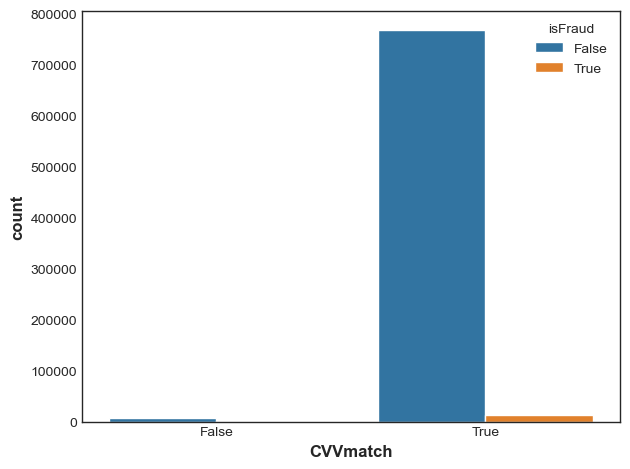

In [83]:
data["CVVmatch"] = data['cardCVV']==data['enteredCVV']
sns.countplot(x='CVVmatch', hue='isFraud', data=data)

<AxesSubplot:xlabel='transactionType', ylabel='count'>

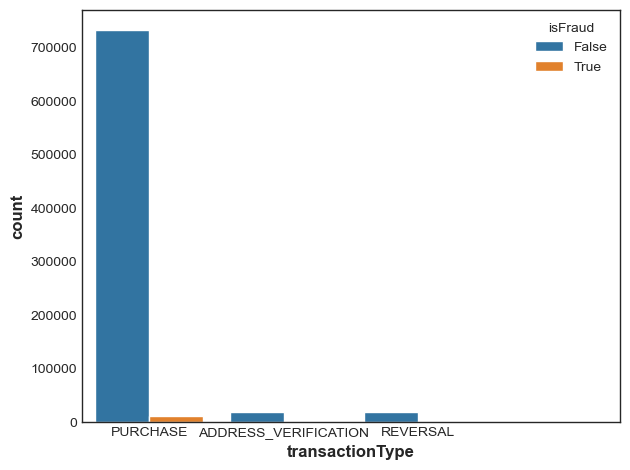

In [84]:
sns.countplot(x='transactionType', hue='isFraud', data=data)

<AxesSubplot:xlabel='transactionType', ylabel='count'>

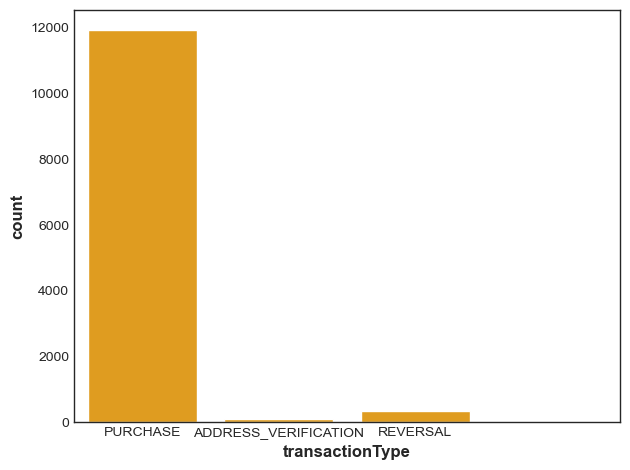

In [85]:
df_fraud = data[data.isFraud ==1] 
sns.countplot(x='transactionType', data=df_fraud, color = "orange")

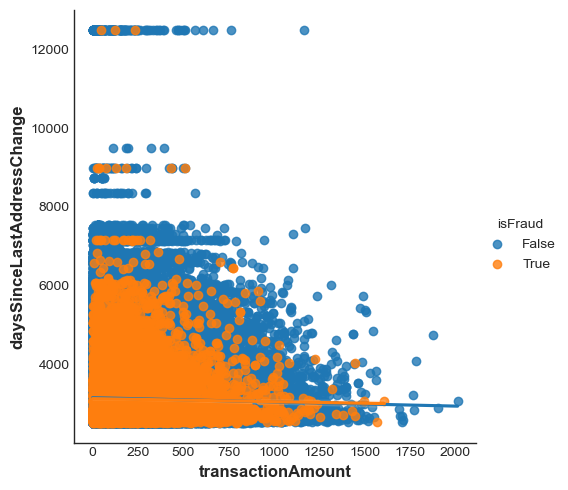

In [86]:
data['dateOfLastAddressChange']    = pd.to_datetime(data['dateOfLastAddressChange'])
data['daysSinceLastAddressChange'] = (pd.to_datetime('today')-data.dateOfLastAddressChange).dt.days

sns.lmplot(x="transactionAmount", y="daysSinceLastAddressChange", hue="isFraud", data=data);

In [87]:
# Top merchants seeing fraud card used
df_isFraud = data[data.isFraud ==1] 
df_isFraud.groupby(['merchantName']).size().sort_values(ascending=False).head(10)

merchantName
Lyft             760
ebay.com         639
Fresh Flowers    553
Uber             512
walmart.com      446
cheapfast.com    442
sears.com        422
oldnavy.com      401
staples.com      399
alibaba.com      383
dtype: int64

In [88]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_g = gnb.fit(X2_train, y2_train).predict(X2_test)

print(classification_report(y2_test, y_pred_g))

print("Percentage Mislabeled points : %d" % (100*((y2_test != y_pred_g).sum()) / (X2_test.shape[0])))

              precision    recall  f1-score   support

         0.0       0.55      0.89      0.68      6183
         1.0       0.72      0.28      0.40      6234

    accuracy                           0.58     12417
   macro avg       0.63      0.58      0.54     12417
weighted avg       0.63      0.58      0.54     12417

Percentage Mislabeled points : 41


# Clustering

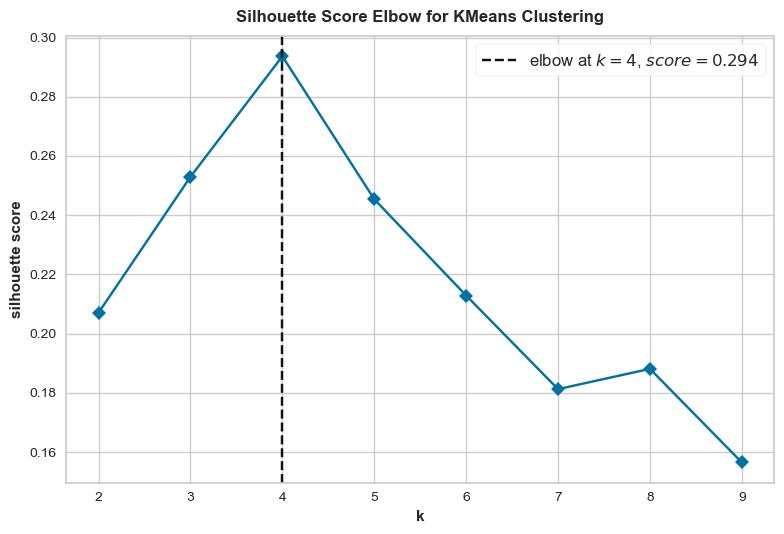

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [89]:
from sklearn.cluster import KMeans

# Silhouette Score for K means
# k is range of number of clusters.
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= False)
visualizer.fit(X2_train)       
visualizer.show()    

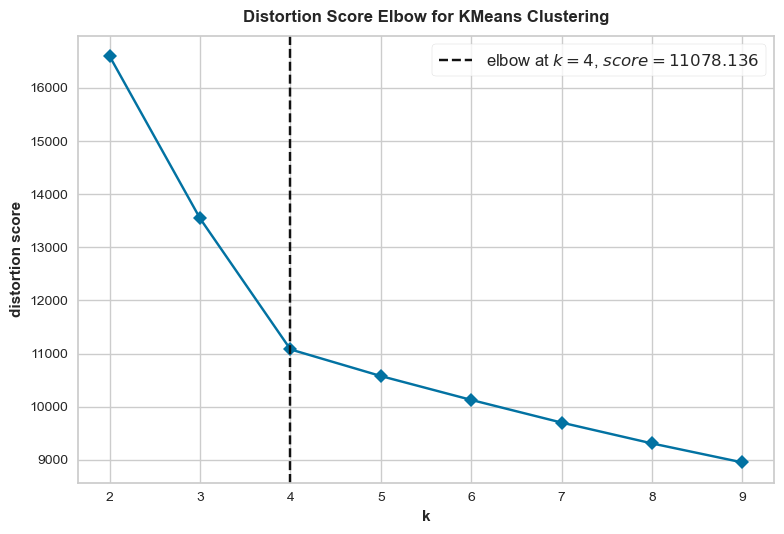

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= False)
visualizer.fit(X2_train)      
visualizer.show()       

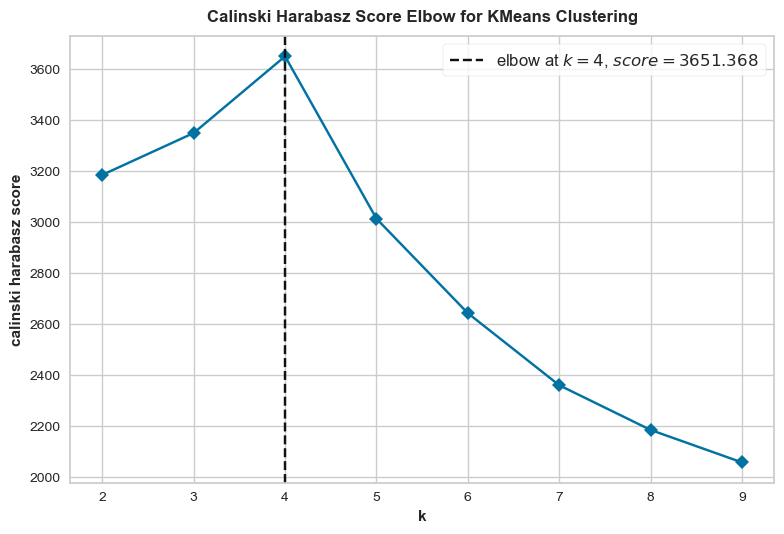

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [91]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= False)
visualizer.fit(X2_train)        
visualizer.show()       

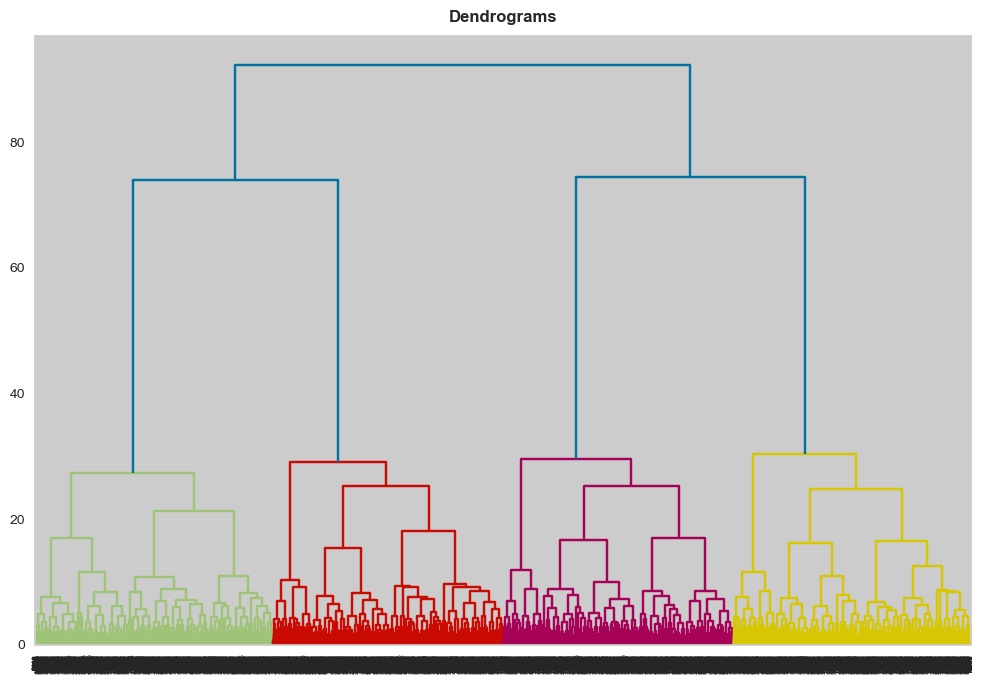

In [92]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X2_train, method='ward'))

In [93]:
# Create cluster feature
from sklearn.cluster import KMeans

#kmeans = KMeans(init="random",n_clusters=4, max_iter=100,random_state=4)
kmeans = KMeans(n_clusters=5)

#X2_train["Cluster"] = kmeans.fit_predict(X2_train)
X2_train["Cluster"] = kmeans.fit_predict(X2_train)
X2_train["Cluster"] = X2_train["Cluster"].astype("category")

#X2_test["Cluster"] = kmeans.predict(X2_test)
#X2_test["Cluster"] = X2_test["Cluster"].astype("category")

In [94]:
X2_train.columns

Index(['expirationDateKeyInMatch', 'merchantName_code', 'acqCountry_code',
       'merchantCountryCode_code', 'posEntryMode_code',
       'posConditionCode_code', 'merchantCategoryCode_code',
       'transactionType_code', 'transactionAmount_int', 'availableMoney_int',
       'CVVmatch', 'availableMoneyScore', 'transactionRange',
       'transactionDateTime_month', 'transactionDateTime_day',
       'transactionDateTime_hour', 'daysSinceLastTransaction',
       'daysSinceLastAddressChange', 'transaction_morning',
       'transaction_afternoon', 'transaction_evening', 'transaction_night',
       'Cluster'],
      dtype='object')

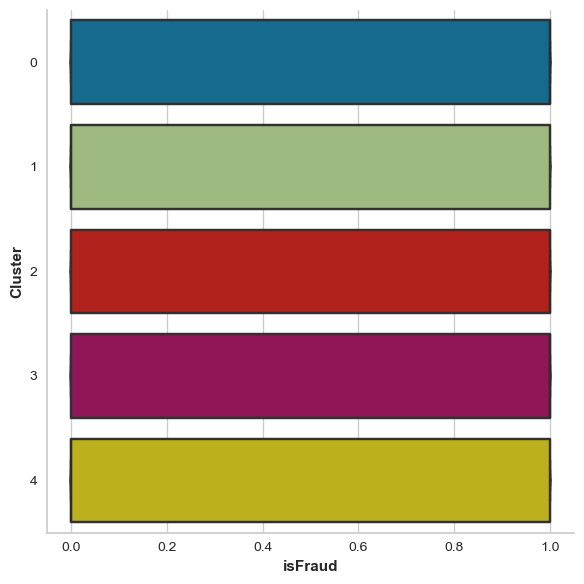

In [95]:
X2_train["isFraud"] = df_reduced["isFraud"]
sns.catplot(x="isFraud", y="Cluster", data=X2_train, kind="boxen", height=6);

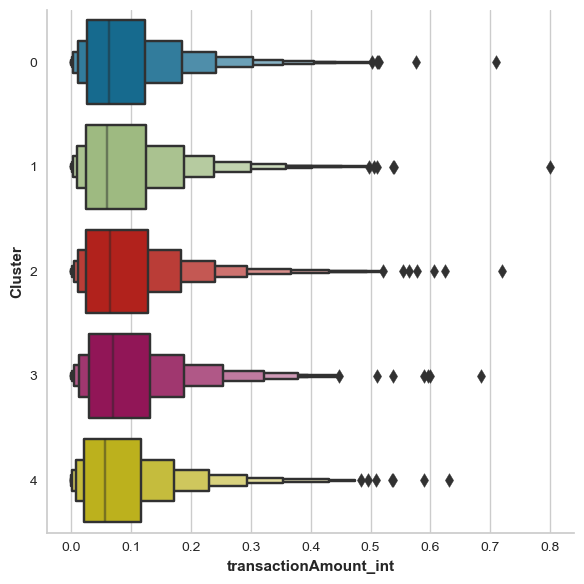

In [96]:
sns.catplot(x="transactionAmount_int", y="Cluster", data=X2_train, kind="boxen", height=6);

In [97]:
X2_fraud = X2_train[X2_train.isFraud ==1] 
cluster1 = X2_train[X2_train.Cluster ==1]
cluster2 = X2_train[X2_train.Cluster ==2] 
cluster3 = X2_train[X2_train.Cluster ==3] 
cluster0 = X2_train[X2_train.Cluster ==0] 

In [98]:
# isFraud numbers by cluster
print("Cluster1:",cluster1.groupby(['isFraud']).size(),"Cluster2:",cluster2.groupby(['isFraud']).size(),"Cluster3:",cluster3.groupby(['isFraud']).size(),"Cluster0:",cluster0.groupby(['isFraud']).size())

Cluster1: isFraud
0.0    1583
1.0    1474
dtype: int64 Cluster2: isFraud
0.0    1545
1.0    1564
dtype: int64 Cluster3: isFraud
0.0     883
1.0    1038
dtype: int64 Cluster0: isFraud
0.0    1267
1.0    1327
dtype: int64


In [99]:
#print(X2_fraud.shape[0], cluster1.shape[0], cluster2.shape[0])
#pf = (100*(cluster1.shape[0] + cluster2.shape[0])/ X2_fraud.shape[0])
#print("Identified ", int(pf), "% of fraud instances")

In [100]:
X_cluster0 = cluster0.drop('isFraud',axis = 1)
y_cluster0 = cluster0['isFraud']

X_train_cluster0,X_test_cluster0,y_train_cluster0,y_test_cluster0 = train_test_split(X_cluster0,y_cluster0,test_size=0.6,random_state=3)

model_dt_0 = DecisionTreeClassifier()
model_dt_0.fit(X_train_cluster0,y_train_cluster0)

y_pred_dt_cluster0 = model_dt_0.predict(X_test_cluster0)

print(f"Accuracy: {accuracy_score(y_test_cluster0,y_pred_dt_cluster0):.2} ")
print(f"Precision: {precision_score(y_test_cluster0,y_pred_dt_cluster0):.2} ")

print(classification_report(y_test_cluster0, y_pred_dt_cluster0))

Accuracy: 0.56 
Precision: 0.58 
              precision    recall  f1-score   support

         0.0       0.54      0.58      0.56       749
         1.0       0.58      0.55      0.57       808

    accuracy                           0.56      1557
   macro avg       0.56      0.56      0.56      1557
weighted avg       0.57      0.56      0.56      1557



In [101]:
X_cluster3 = cluster3.drop('isFraud',axis = 1)
y_cluster3 = cluster3['isFraud']

X_train_cluster3,X_test_cluster3,y_train_cluster3,y_test_cluster3 = train_test_split(X_cluster3,y_cluster3,test_size=0.6,random_state=3)

model_dt_3 = DecisionTreeClassifier()
model_dt_3.fit(X_train_cluster3,y_train_cluster3)

y_pred_dt_cluster3 = model_dt_3.predict(X_test_cluster3)

print(f"Accuracy: {accuracy_score(y_test_cluster3,y_pred_dt_cluster3):.2} ")
print(f"Precision: {precision_score(y_test_cluster3,y_pred_dt_cluster3):.2} ")

print(classification_report(y_test_cluster3, y_pred_dt_cluster3))

Accuracy: 0.62 
Precision: 0.66 
              precision    recall  f1-score   support

         0.0       0.57      0.60      0.59       520
         1.0       0.66      0.63      0.65       633

    accuracy                           0.62      1153
   macro avg       0.62      0.62      0.62      1153
weighted avg       0.62      0.62      0.62      1153



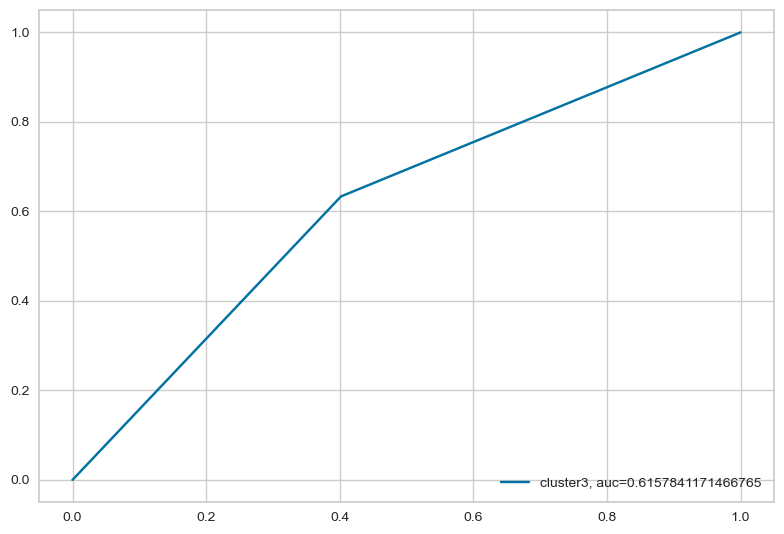

In [102]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test_cluster3, y_pred_dt_cluster3)
auc = metrics.roc_auc_score(y_test_cluster3, y_pred_dt_cluster3)
plt.plot(fpr,tpr,label="cluster3, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Clustering with reduced number of features

In [103]:
print(impfeatures[:8])

['CVVmatch', 'expirationDateKeyInMatch', 'acqCountry_code', 'merchantCountryCode_code', 'transactionRange', 'transaction_evening', 'transactionType_code', 'transaction_night']


In [104]:
num_impfeatures = 8

X3_train = X2_train[impfeatures[:num_impfeatures]].copy()
y3_train = y2_train

X3_train.drop(['Cluster'],axis = 1,inplace = True)


X3_test = X2_test[impfeatures[:num_impfeatures]].copy()
y3_test = y2_test

KeyError: "['Cluster'] not found in axis"

In [ ]:
print(X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape)

In [ ]:
# Create cluster feature
#from sklearn.cluster import KMeans

kmeans3 = KMeans(n_clusters=4)
X3_train["Cluster2"] = kmeans3.fit_predict(X3_train)
X3_train["Cluster2"] = X3_train["Cluster2"].astype("category")

In [ ]:
model_dt3 = DecisionTreeClassifier()
model_dt3.fit(X3_train,y3_train)

y3_pred_dt = model_dt3.predict(X3_test)

print(f"Accuracy: {accuracy_score(y3_test,y3_pred_dt):.2} ")
print(f"Precision: {precision_score(y3_test,y3_pred_dt):.2} ")

print("Percentage Mislabeled points : %d" % (100*((y3_test != y3_pred_dt).sum()) / (X3_test.shape[0])))
print("")
print(classification_report(y3_test, y3_pred_dt))

# One hot encoding with top 5 features